In [254]:
import numpy as np
import matplotlib.pyplot as plt

def factorial(n):
  if n <= 1:
    return 1
  return n * factorial(n - 1)

def choose(n, k):
  return factorial(n) / (factorial(k) * factorial(n - k))

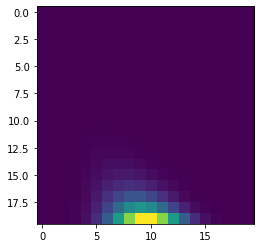

In [255]:
N = 20
triangle = np.zeros((N, N))
for i in range(N):
  for j in range(i + 1):
    triangle[i,j] = choose(i, j)

plt.imshow(triangle)

In [256]:
maxLength = 0
maxLengthNumber = 0
def getRowAsString(rowNum, array):
  global maxLength
  global maxLengthNumber
  row = array[rowNum]
  out = ''
  for i in row:
    if i == 0:
      continue
    numberString = str(int(i))
    maxLengthNumber = maxLengthNumber if maxLengthNumber > len(numberString) else len(numberString)
    padding = maxLengthNumber - len(numberString)
    out = out + padding * ' ' + str(int(i)) + ' '
  out = out[0:len(out) - 1]
  maxLength = maxLength if maxLength > len(out) else len(out)
  padding = (maxLength - len(out)) // 2
  return padding * ' ' + out + padding * ' '

rows = []
i = N - 1
while i >= 0:
  rows.append(getRowAsString(i, triangle))
  i -= 1

In [257]:
i = N - 1
while i >= 1:
  print(rows[i])
  i -= 1

                                                          1                                                      
                                                       1     1                                                   
                                                    1     2     1                                                
                                                 1     3     3     1                                             
                                              1     4     6     4     1                                          
                                           1     5    10    10     5     1                                       
                                        1     6    15    20    15     6     1                                    
                                     1     7    21    35    35    21     7     1                                 
                                  1     8    28    56    70    56    28     8     1     

In [258]:
# Euler notatin
m = 4.3
p = np.pi / 4
euler = m * np.exp(1j * p)
rect = m * (np.cos(p) + 1j * np.sin(p))
print(euler)
print(rect)

(3.0405591591021546+3.040559159102154j)
(3.0405591591021546+3.040559159102154j)


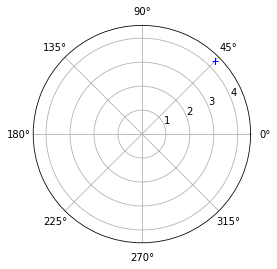

In [259]:
plt.polar(p,m,'b+')

In [260]:
# Parameterized Gaussian

In [261]:
class Gaussian:
  def __init__(self, a, sigma, tau):
    self.a = a
    self.sigma = sigma
    self.tau = tau
  
  def calculate(self, xArray):
    a = self.a
    sigma = self.sigma
    tau = self.tau
    result = np.zeros(len(xArray))
    i = 0
    for x in xArray:
      result[i] = (a / (sigma * np.sqrt(2 * np.pi))) * np.exp(-((x-tau)**2) / (2 * sigma**2))
      i += 1
    return result


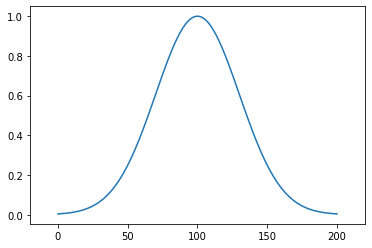

In [262]:
sigma = 30
average = 100
gaussian = Gaussian(sigma * np.sqrt(2 * np.pi), sigma, average)
x = np.linspace(0, 200, 200)
distribution = gaussian.calculate(np.linspace(0, 200, 200))
plt.plot(x, distribution)
plt.xlim(average - 4 * sigma, average + 4 * sigma)
plt.show()

In [263]:
 # Time dilation in special relativity

In [264]:
speedOfLight = 299_792_458
timeDilCoeffMPerSecond = lambda velocity: (1 / np.sqrt(1-(velocity / speedOfLight)**2))
timeDilCoeffKmPerHour = lambda velocity: timeDilCoeffMPerSecond(velocity / 3.6)

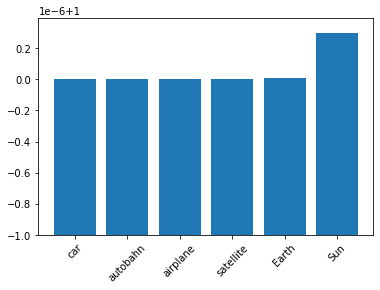

In [265]:
kph = np.zeros(6)
kph[0] = 100    # car on highway
kph[1] = 200    # crazy people on highway
kph[2] = 900    # airplane
kph[3] = 11300  # satellite
kph[4] = 107991 # Earth around the Sun
kph[5] = 828000 # Solar system around galaxy

timeDilations = timeDilCoeffKmPerHour(kph)

plt.bar(range(len(timeDilations)), timeDilations)
plt.ylim([.999999, np.max(timeDilations) + 0.0000001])
plt.xticks(ticks=range(len(kph)),labels=['car', 'autobahn', 'airplane', 'satellite', 'Earth', 'Sun'],rotation=45)
plt.show()

In [266]:
print((np.min(timeDilations), np.max(timeDilations)))

(1.0000000000000044, 1.0000002942960697)
